In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from sklearn.metrics import classification_report,confusion_matrix
import os
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import wandb
from tqdm import tqdm

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models
import cv2

from tqdm import tqdm
from collections import defaultdict
from torchvision.utils import make_grid
from tqdm.notebook import tqdm
import random
import warnings
from PIL import Image

warnings.filterwarnings('ignore')

In [8]:
# !pip install wandb

In [5]:
import wandb

# EDA

In [3]:
data_path = '../input/new-plant-diseases-dataset/'
train_folder_14p = os.path.join(data_path, 'New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)', 'train')
valid_folder_14p = os.path.join(data_path, 'New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)', 'valid')

five_data_path='../input/five-crop-disease-dataset/'
train_folder_5p = os.path.join(data_path, 'New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)', 'train')


# 14 plants class distribution

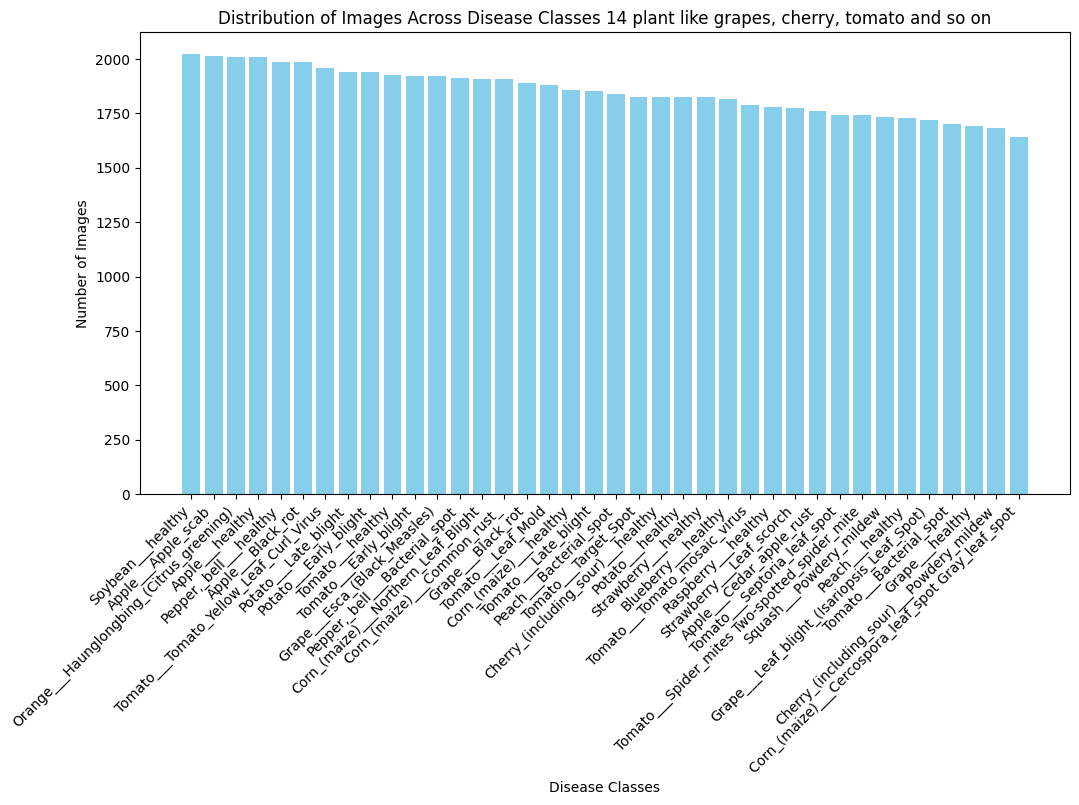

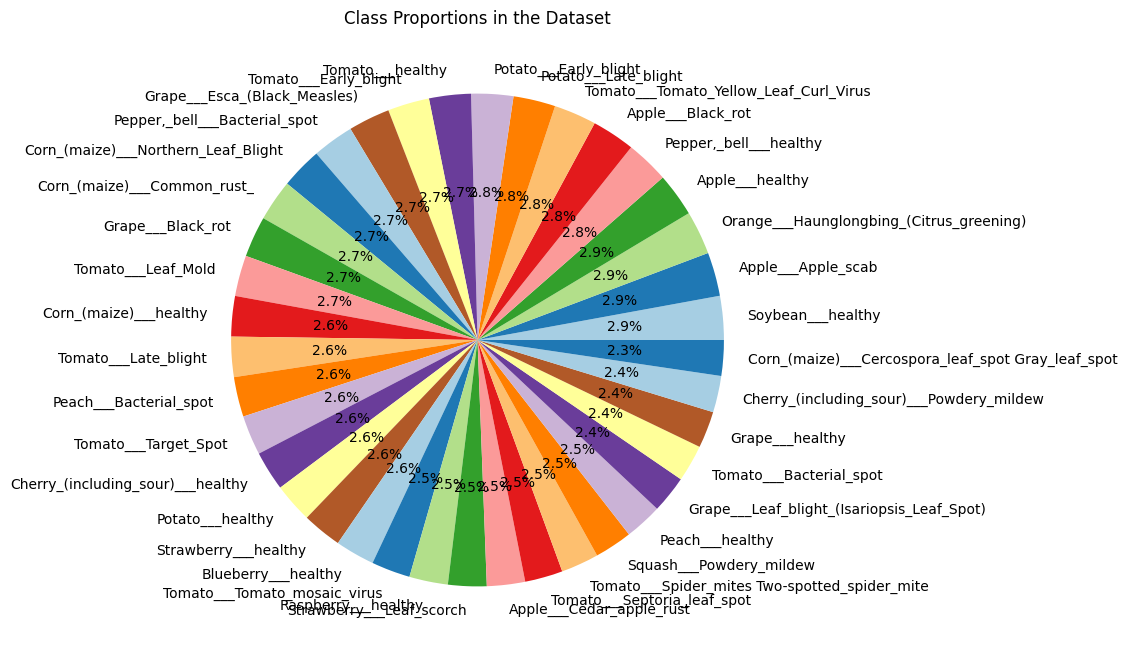

In [7]:
import os
import matplotlib.pyplot as plt

# Define the dataset path
dataset_path = train_folder_14p

# Get the class names and count images in each class
class_counts = {}
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Sort class counts for better visualization
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Disease Classes")
plt.ylabel("Number of Images")
plt.title("Distribution of Images Across Disease Classes 14 plant like grapes, cherry, tomato and so on")
plt.show()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Class Proportions in the Dataset")
plt.show()


# Rice lead Disease detection

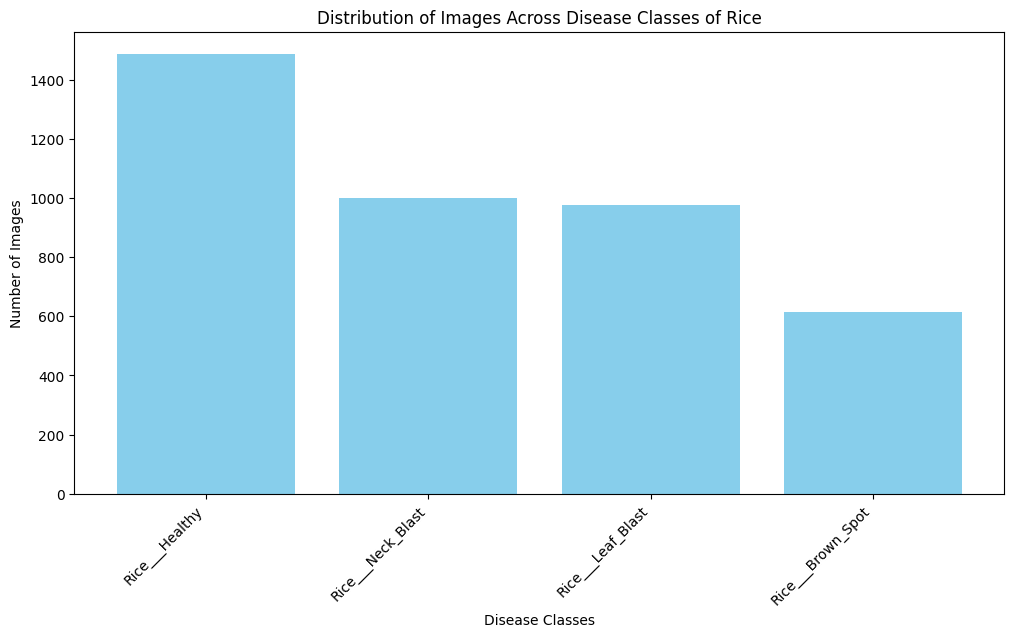

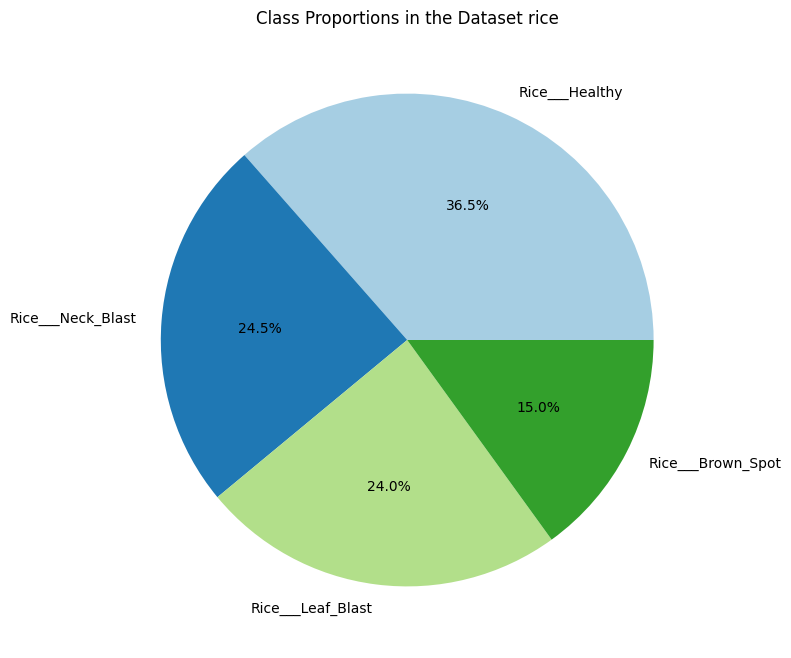

In [8]:
import os
import matplotlib.pyplot as plt

# Define the dataset path
dataset_path = '/kaggle/input/five-crop-diseases-dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice'
# Get the class names and count images in each class
class_counts = {}
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Sort class counts for better visualization
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Disease Classes")
plt.ylabel("Number of Images")
plt.title("Distribution of Images Across Disease Classes of Rice")
plt.show()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Class Proportions in the Dataset rice")
plt.show()


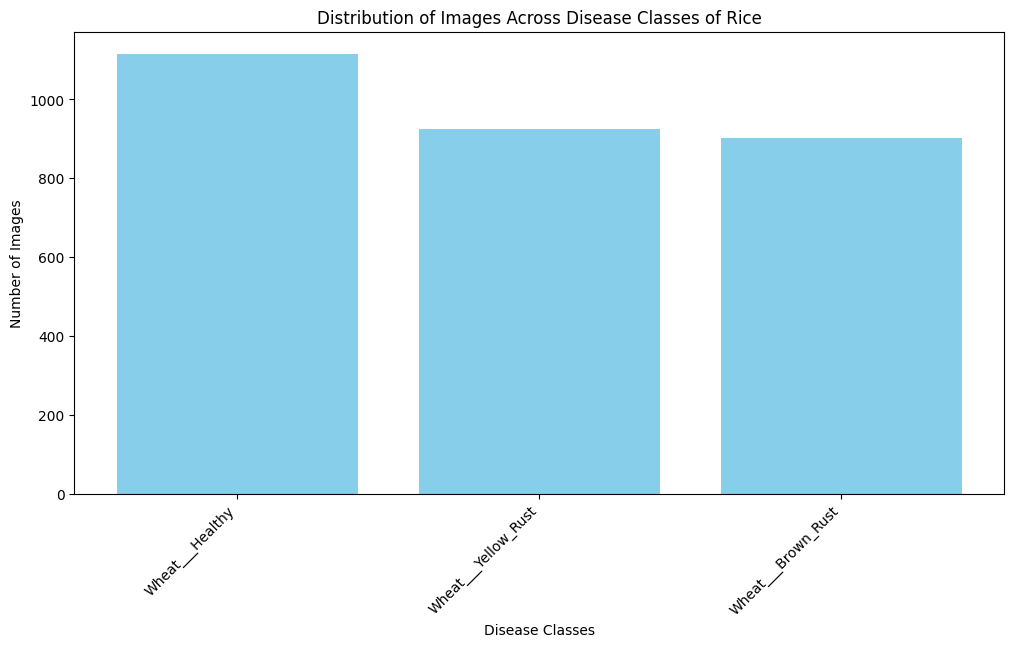

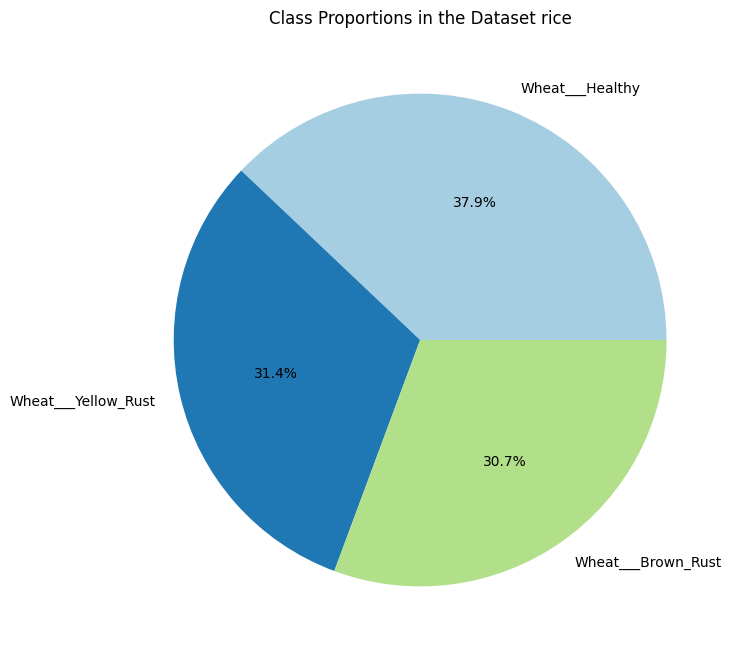

In [9]:
import os
import matplotlib.pyplot as plt

# Define the dataset path
dataset_path = '/kaggle/input/five-crop-diseases-dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Wheat'
# Get the class names and count images in each class
class_counts = {}
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Sort class counts for better visualization
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Disease Classes")
plt.ylabel("Number of Images")
plt.title("Distribution of Images Across Disease Classes of Rice")
plt.show()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Class Proportions in the Dataset rice")
plt.show()


# Data Augmentation wheat plant disease detection

In [11]:
import os
import cv2
import albumentations as 
import numpy as np
import random

# Dataset Paths
dataset_path = "/kaggle/input/five-crop-diseases-dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Wheat"
save_path = "/kaggle/working/augmented_dataset_wheat"

# Target minimum images per class
TARGET_IMAGES = 1800

# Define Augmentation Pipeline (Without Resizing or Cropping)
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=30, border_mode=cv2.BORDER_REFLECT_101, p=0.5),  # Keeps the same size
    A.GaussianBlur(blur_limit=(3, 7), p=0.3),
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.2),
])

# Ensure save directory exists
os.makedirs(save_path, exist_ok=True)

# Loop through each class folder
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    save_class_path = os.path.join(save_path, class_name)
    os.makedirs(save_class_path, exist_ok=True)

    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))]
        num_images = len(images)

        if num_images < TARGET_IMAGES:
            print(f"Augmenting class: {class_name} ({num_images} images)")

            while num_images < TARGET_IMAGES:
                # Pick only from original images (avoid generated ones)
                original_image = random.choice([img for img in images if not img.startswith("aug_")])
                img_path = os.path.join(class_path, original_image)

                # Read Image with Error Handling
                image = cv2.imread(img_path)
                if image is None:
                    print(f"Warning: Could not read image {img_path}. Skipping...")
                    continue  # Skip this image

                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Apply Augmentation (No resizing or cropping)
                augmented = augmentations(image=image)['image']

                # Convert back to BGR for saving
                augmented = cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR)

                # Save new image in `save_path`
                new_filename = f"aug_{num_images}.jpg"
                new_filepath = os.path.join(save_class_path, new_filename)
                cv2.imwrite(new_filepath, augmented)

                num_images += 1  # Update the count correctly

            print(f"Class {class_name} now has {num_images} images.")

print("Data Augmentation Completed!")


In [ ]:
# !zip -r /kaggle/working/augmented_dataset2.zip /kaggle/working/augmented_dataset_wheat

# Data Augmentation Rice plant disease detection

In [ ]:
import os
import cv2
import albumentations as A
import numpy as np
import random

# Dataset Paths
dataset_path = "/kaggle/input/five-crop-diseases-dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice"
save_path = "/kaggle/working/augmented_dataset_Rice"

# Target minimum images per class
TARGET_IMAGES = 1800

# Define Augmentation Pipeline (Without Resizing or Cropping)
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=30, border_mode=cv2.BORDER_REFLECT_101, p=0.5),  # Keeps the same size
    A.GaussianBlur(blur_limit=(3, 7), p=0.3),
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.2),
])

# Ensure save directory exists
os.makedirs(save_path, exist_ok=True)

# Loop through each class folder
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    save_class_path = os.path.join(save_path, class_name)
    os.makedirs(save_class_path, exist_ok=True)

    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))]
        num_images = len(images)

        if num_images < TARGET_IMAGES:
            print(f"Augmenting class: {class_name} ({num_images} images)")

            while num_images < TARGET_IMAGES:
                # Pick only from original images (avoid generated ones)
                original_image = random.choice([img for img in images if not img.startswith("aug_")])
                img_path = os.path.join(class_path, original_image)

                # Read Image with Error Handling
                image = cv2.imread(img_path)
                if image is None:
                    print(f"Warning: Could not read image {img_path}. Skipping...")
                    continue  # Skip this image

                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Apply Augmentation (No resizing or cropping)
                augmented = augmentations(image=image)['image']

                # Convert back to BGR for saving
                augmented = cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR)

                # Save new image in `save_path`
                new_filename = f"aug_{num_images}.jpg"
                new_filepath = os.path.join(save_class_path, new_filename)
                cv2.imwrite(new_filepath, augmented)

                num_images += 1  # Update the count correctly

            print(f"Class {class_name} now has {num_images} images.")

print("Data Augmentation Completed!")


In [ ]:
# !zip -r /kaggle/working/augmented_dataset_Rice.zip /kaggle/working/augmented_dataset_Rice

# BUILDING DATASET

In [4]:
import os
import cv2
import numpy as np
import random
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from tqdm import tqdm

def format_label(text):
    disease_labels = {
        "yellow_rust", "mildew", "brown_rust", "common_root_rot", "blast", "mite", 
        "septoria", "healthy", "leaf_blight", "black_rust", "tan_spot", "stem_fly", 
        "smut", "aphid", "fusarium_head_blight"
    }

    if not text.islower():
        text = text.lower()
    
    text_list = []
    newtext = ""

    if " " in text:
        text_list = text.split(" ")
    elif "_" in text:
        text_list = text.split("_")
    else:
        text_list = text.split()

    for i in text_list:
        if not (i == "valid" or i == "train" or i == "test"):
            newtext += i + "_"

    text = newtext[:-1]  # Remove last underscore
    
    # Add "wheat_" prefix **only if it's in the disease_labels set**
    if text in disease_labels:
        text = "wheat_" + text

    return text


class ImageDataset(Dataset):
    def __init__(self, root_directories, image_size=(128, 128), grayscale=False, prefixes=None, transform=None):
        """
        Initializes the dataset.
        :param root_directories: List of root directories containing images in nested subdirectories.
        :param image_size: Desired image size (width, height).
        :param grayscale: Whether to load images in grayscale.
        :param prefixes: List of prefixes for labels from each root directory.
        :param transform: Optional torchvision transforms for augmentation.
        """
        self.root_directories = root_directories if isinstance(root_directories, list) else [root_directories]
        self.image_size = image_size
        self.grayscale = grayscale
        self.prefixes = prefixes if prefixes else ["" for _ in self.root_directories]
        self.transform = transform if transform else self.default_transform()

        # Ensure prefixes list matches the number of root directories
        if len(self.prefixes) < len(self.root_directories):
            self.prefixes.extend([""] * (len(self.root_directories) - len(self.prefixes)))

        # Collect all image paths and labels
        self.image_paths = []
        self.labels = []
        self.label_to_index = {}  # Dictionary to store label to index mapping
        self.index_to_label = {}  # Dictionary to map index back to label

        print("Loading dataset...")
        for root_directory, prefix in zip(self.root_directories, self.prefixes):
            for subdir, _, files in tqdm(os.walk(root_directory), desc=f"Scanning {root_directory}"):
                for file in files:
                    img_path = os.path.join(subdir, file)
                    label = os.path.basename(os.path.dirname(img_path))  # Parent folder as label
                    label = format_label(f"{prefix}{label}")  # Add prefix if provided
                    if label not in self.label_to_index:
                        index = len(self.label_to_index)
                        self.label_to_index[label] = index  # Assign numeric label
                        self.index_to_label[index] = label  # Create reverse mapping

                    self.image_paths.append(img_path)
                    self.labels.append(self.label_to_index[label])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        """
        Loads an image and returns it as a PyTorch tensor with its label.
        :param index: Index of the image.
        :return: (image tensor, label index)
        """
        if index >= len(self.image_paths):
            raise IndexError("Index out of range")
        
        image_path = self.image_paths[index]
        label = self.labels[index]
        flag = cv2.IMREAD_GRAYSCALE if self.grayscale else cv2.IMREAD_COLOR
        
        # Load the image without checking its extension
        image = cv2.imread(image_path, flag)
        
        # If image loading fails, return a blank image
        if image is None:
            image = self.create_blank_image()

        image = cv2.resize(image, self.image_size)

        if not self.grayscale:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        
        # Convert to tensor and apply transforms
        image = self.transform(image)

        return image, label
    
    def create_blank_image(self):
        """
        Creates a blank image in case loading fails.
        """
        if self.grayscale:
            return np.zeros((self.image_size[1], self.image_size[0]), dtype=np.uint8)
        else:
            return np.zeros((self.image_size[1], self.image_size[0], 3), dtype=np.uint8)

    def default_transform(self):
        """
        Default transformation (convert to tensor and normalize).
        """
        transform_list = [transforms.ToTensor()]
        if not self.grayscale:
            transform_list.append(transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]))  # Normalize RGB
        
        return transforms.Compose(transform_list)

    def get_all_images(self):
        """
        Loads all images in the dataset with a progress bar.
        :return: List of (image tensor, label) tuples.
        """
        return [self[i] for i in tqdm(range(len(self)), desc="Loading images")]

    def merge(self, other):
        """
        Merges another ImageDataset into the current dataset.
        :param other: Another ImageDataset object.
        """
        if not isinstance(other, ImageDataset):
            raise TypeError("Can only merge with another ImageDataset instance")
        if self.image_size != other.image_size:
            raise ValueError("Cannot merge datasets with different image sizes")
        if self.grayscale != other.grayscale:
            raise ValueError("Cannot merge datasets with different grayscale settings")

        offset = len(self.label_to_index)  # Offset new labels
        for label, index in other.label_to_index.items():
            if label not in self.label_to_index:
                new_index = offset + index
                self.label_to_index[label] = new_index
                self.index_to_label[new_index] = label  # Update reverse mapping

        self.image_paths.extend(other.image_paths)
        self.labels.extend([self.label_to_index[other.index_to_label[i]] for i in other.labels])

    def split(self, train_ratio=0.8, shuffle=True):
        """
        Splits the dataset into two subsets.
        :param train_ratio: Fraction of data to include in the first subset (default: 0.8).
        :param shuffle: Whether to shuffle the data before splitting (default: True).
        :return: Two ImageDataset objects (train, validation/test).
        """
        indices = list(range(len(self.image_paths)))
        if shuffle:
            random.shuffle(indices)

        split_idx = int(len(indices) * train_ratio)
        train_indices, val_indices = indices[:split_idx], indices[split_idx:]

        train_dataset = ImageDataset([], self.image_size, self.grayscale)
        val_dataset = ImageDataset([], self.image_size, self.grayscale)

        train_dataset.image_paths = [self.image_paths[i] for i in train_indices]
        train_dataset.labels = [self.labels[i] for i in train_indices]
        train_dataset.label_to_index = self.label_to_index
        train_dataset.index_to_label = self.index_to_label  # Maintain mapping

        val_dataset.image_paths = [self.image_paths[i] for i in val_indices]
        val_dataset.labels = [self.labels[i] for i in val_indices]
        val_dataset.label_to_index = self.label_to_index
        val_dataset.index_to_label = self.index_to_label  # Maintain mapping

        return train_dataset, val_dataset


In [5]:
import os
data_path = '../input/new-plant-diseases-dataset/'
train_folder = os.path.join(data_path, 'New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)', 'train')
valid_folder = os.path.join(data_path, 'New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)', 'valid')

In [6]:
import time


start_time = time.time()  # Start time

root_directories = [
    train_folder,
    '/kaggle/input/dataaugmentationrice/kaggle/working/augmented_dataset_Rice',
    '/kaggle/input/dataaugmentationwheat2/kaggle/working/augmented_dataset_wheat',
    '/kaggle/input/five-crop-diseases-dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Wheat',
    '/kaggle/input/five-crop-diseases-dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice',
    
]
# prefixes = ['', 'Wheat_', 'Rice_']

train_dataset = ImageDataset(
    root_directories=root_directories, 
    image_size=(128, 128), 
    grayscale=False,
    # prefixes=prefixes  # Prefix for labels
)

Loading dataset...


Scanning ../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train: 39it [01:45,  2.70s/it]
Scanning /kaggle/input/dataaugmentationrice/kaggle/working/augmented_dataset_Rice: 5it [00:11,  2.31s/it]
Scanning /kaggle/input/dataaugmentationwheat2/kaggle/working/augmented_dataset_wheat: 4it [00:09,  2.37s/it]
Scanning /kaggle/input/five-crop-diseases-dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Wheat: 4it [00:09,  2.46s/it]
Scanning /kaggle/input/five-crop-diseases-dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice: 5it [00:12,  2.41s/it]


In [8]:
# num_classes = set([label for  label in train_dataset.labels])
# print("Number of classes:", num_classes)
# for i in num_classes:
#     print(train_dataset.index_to_label[i])

Number of classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44}
tomato___late_blight
tomato___healthy
grape___healthy
orange___haunglongbing_(citrus_greening)
soybean___healthy
squash___powdery_mildew
potato___healthy
corn_(maize)___northern_leaf_blight
tomato___early_blight
tomato___septoria_leaf_spot
corn_(maize)___cercospora_leaf_spot_gray_leaf_spot
strawberry___leaf_scorch
peach___healthy
apple___apple_scab
tomato___tomato_yellow_leaf_curl_virus
tomato___bacterial_spot
apple___black_rot
blueberry___healthy
cherry_(including_sour)___powdery_mildew
peach___bacterial_spot
apple___cedar_apple_rust
tomato___target_spot
pepper,_bell___healthy
grape___leaf_blight_(isariopsis_leaf_spot)
potato___late_blight
tomato___tomato_mosaic_virus
strawberry___healthy
apple___healthy
grape___black_rot
potato___early_blight
cherry_(including_sour)___healthy
corn_(maize)___common

In [ ]:
# root_directories2 = [
#     valid_folder,
#     '/kaggle/input/wheat-plant-diseases/data/test',
#     '/kaggle/input/wheat-plant-diseases/data/valid',
#     '/kaggle/input/rice-leaf-diseases-detection/Rice_Leaf_Diease/Rice_Leaf_Diease/test',
#     '/kaggle/input/augmenteddatasetofwheatrice/augmented_dataset_wheat_valid/kaggle/working/augmented_dataset_wheat_Valid'
# ]
# prefixes2 = ['','Wheat_','Wheat_','Rice_']

# val_test_dataset = ImageDataset(
#     root_directories=root_directories2, 
#     image_size=(128, 128), 
#     grayscale=False,
#     prefixes=prefixes2  # Prefix for labels
# )

In [ ]:
# print(len(train_dataset))

In [ ]:
# print(len(val_test_dataset))

In [ ]:
# import torch
# import multiprocessing

# num_workers = min(16, multiprocessing.cpu_count())  # Use available CPU cores but max 16
# print(f"Using {num_workers} workers")

In [ ]:
# batch_size = 32
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,num_workers=4)

In [9]:
from torch.utils.data import DataLoader, random_split

# Define dataset split ratios
train_ratio = 0.7  # 70% for training
val_ratio = 0.15 # 15% for validation
test_ratio = 0.15  # 15% for testing

# Ensure the ratios sum to 1
assert train_ratio + val_ratio + test_ratio == 1, "Ratios must sum to 1."

# Get dataset size
total_size = len(train_dataset)
train_size = int(total_size * train_ratio)
val_test_size = total_size - train_size  # Remaining data for val + test

# First, split into train and (val + test)
train_dataset, val_test_dataset = random_split(train_dataset, [train_size, val_test_size])

# Now, split val_test_dataset into validation and test sets
val_size = int(val_test_size * (val_ratio / (val_ratio + test_ratio)))  # Scale correctly
test_size = val_test_size - val_size  # Remaining goes to test

val_dataset, test_dataset = random_split(val_test_dataset, [val_size, test_size])

# Create DataLoaders
batch_size = 32  # Define batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Print dataset sizes
print(f"Total Images: {total_size}")
print(f"Train Set: {len(train_dataset)} images")
print(f"Validation Set: {len(val_dataset)} images")
print(f"Test Set: {len(test_dataset)} images")


Total Images: 82895
Train Set: 58026 images
Validation Set: 12434 images
Test Set: 12435 images


In [10]:
# Print dataset sizes
print(f"Total Images: {total_size}")
print(f"Train Set: {len(train_dataset)} images")
print(f"Validation Set: {len(val_dataset)} images")
print(f"Test Set: {len(test_dataset)} images")

Total Images: 82895
Train Set: 58026 images
Validation Set: 12434 images
Test Set: 12435 images


In [ ]:
# num_classes_val = set([label for  label in val_test_dataset.labels])
# num_classes_val_len = len(set([label for  label in val_test_dataset.labels]))

# print("Number of classes:", num_classes_val_len)
# for i in num_classes_val:
#     print(val_test_dataset.index_to_label[i])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch
import torch.nn as nn
import torch.nn.functional as F

class PlantDiseaseModel(nn.Module):
    def __init__(self, num_classes=45):
        super(PlantDiseaseModel, self).__init__()

        # Block 1
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.3)

        # Block 2
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(0.3)

        # Block 3
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.dropout3 = nn.Dropout(0.4)

        # Block 4
        self.conv7 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn7 = nn.BatchNorm2d(512)
        self.conv8 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn8 = nn.BatchNorm2d(512)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.dropout4 = nn.Dropout(0.4)

        # Block 5 (Extra Layers for Depth)
        self.conv9 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
        self.bn9 = nn.BatchNorm2d(1024)
        self.conv10 = nn.Conv2d(1024, 1024, kernel_size=3, padding=1)
        self.bn10 = nn.BatchNorm2d(1024)
        self.pool5 = nn.MaxPool2d(2, 2)
        self.dropout5 = nn.Dropout(0.5)

        # Fully connected layers
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(1024, 1024)
        self.dropout6 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x)))))))
        x = self.dropout1(x)

        x = self.pool2(F.relu(self.bn4(self.conv4(F.relu(self.bn3(self.conv3(x)))))))
        x = self.dropout2(x)

        x = self.pool3(F.relu(self.bn6(self.conv6(F.relu(self.bn5(self.conv5(x)))))))
        x = self.dropout3(x)

        x = self.pool4(F.relu(self.bn8(self.conv8(F.relu(self.bn7(self.conv7(x)))))))
        x = self.dropout4(x)

        x = self.pool5(F.relu(self.bn10(self.conv10(F.relu(self.bn9(self.conv9(x)))))))
        x = self.dropout5(x)

        x = self.global_avg_pool(x)
        x = torch.flatten(x, start_dim=1)

        x = F.relu(self.fc1(x))
        x = self.dropout6(x)

        x = self.fc2(x)

        return x




In [50]:
# Initialize Weights & Biases (wandb)
!wandb login 9c0137e47668417ccd9d5847ee64b54840f7694f
wandb.init(project="plant-disease-classification_Final_againwITH0.001LEARNINGRAGTEWith15Roundusingresnet", config={
    "learning_rate": 0.001,
    "epochs": 15,
    "batch_size": train_loader.batch_size
})

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [39]:

# def plot_metrics(train_losses, val_losses, train_accs, val_accs):
#     epochs = range(1, len(train_losses) + 1)
#     plt.figure(figsize=(12, 5))
    
#     plt.subplot(1, 2, 1)
#     plt.plot(epochs, train_losses, label='Train Loss')
#     plt.plot(epochs, val_losses, label='Val Loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.title('Loss vs. Epochs')
    
#     plt.subplot(1, 2, 2)
#     plt.plot(epochs, train_accs, label='Train Acc')
#     plt.plot(epochs, val_accs, label='Val Acc')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.title('Accuracy vs. Epochs')
    
#     plt.show()

In [40]:


def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    correct, total, val_loss = 0, 0, 0.0
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    
    val_loss /= total if total > 0 else 1
    val_acc = correct / total if total > 0 else 0
    return val_loss, val_acc


def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device="cuda"):
    model.to(device)
    
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
        
        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
        train_loss = running_loss / total if total > 0 else 0
        train_acc = correct / total if total > 0 else 0
        
        val_loss, val_acc = evaluate_model(model, val_loader, criterion, device)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
        # Log metrics to wandb
        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_loss": val_loss,
            "val_acc": val_acc,
            "memory_usage": torch.cuda.memory_allocated(device) / 1e6  # In MB
        })
        
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    
    plot_metrics(train_losses, val_losses, train_accs, val_accs)

In [41]:
print(torch.cuda.is_available())


True


In [42]:

# Initialize model, criterion, optimizer
num_classes = 45  # Update based on dataset
model = PlantDiseaseModel(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=15, device=device)

Epoch 1/15 - Train Loss: 2.3661, Train Acc: 0.2813, Val Loss: 1.4162, Val Acc: 0.5240


Epoch 2/15 - Train Loss: 1.3520, Train Acc: 0.5631, Val Loss: 0.7925, Val Acc: 0.7431


Epoch 3/15 - Train Loss: 1.0094, Train Acc: 0.6748, Val Loss: 0.5675, Val Acc: 0.8114


Epoch 4/15 - Train Loss: 0.8140, Train Acc: 0.7353, Val Loss: 0.4402, Val Acc: 0.8545


Epoch 5/15 - Train Loss: 0.6605, Train Acc: 0.7834, Val Loss: 0.3737, Val Acc: 0.8696


Epoch 6/15 - Train Loss: 0.5662, Train Acc: 0.8134, Val Loss: 0.3681, Val Acc: 0.8704


Epoch 7/15 - Train Loss: 0.4802, Train Acc: 0.8404, Val Loss: 0.2453, Val Acc: 0.9122


Epoch 8/15 - Train Loss: 0.4093, Train Acc: 0.8633, Val Loss: 0.1960, Val Acc: 0.9314


Epoch 9/15 - Train Loss: 0.3605, Train Acc: 0.8811, Val Loss: 0.2218, Val Acc: 0.9260


Epoch 10/15 - Train Loss: 0.3230, Train Acc: 0.8938, Val Loss: 0.1680, Val Acc: 0.9402


Epoch 11/15 - Train Loss: 0.2913, Train Acc: 0.9035, Val Loss: 0.1675, Val Acc: 0.9443


Epoch 12/15 - Train Loss: 0.2616, Train Acc: 0.9126, Val Loss: 0.1549, Val Acc: 0.9479


Epoch 13/15 - Train Loss: 0.2326, Train Acc: 0.9234, Val Loss: 0.1427, Val Acc: 0.9539


Epoch 14/15 - Train Loss: 0.2126, Train Acc: 0.9281, Val Loss: 0.1885, Val Acc: 0.9400


Epoch 15/15 - Train Loss: 0.1928, Train Acc: 0.9351, Val Loss: 0.1183, Val Acc: 0.9628


wandb: ERROR Control-C detected -- Run data was not synced


KeyboardInterrupt: 

In [ ]:
wandb.finish()
print("\n### Experimental Setup ###")
print("1. Model: Custom CNN with 5 convolutional blocks and dropout.")
print("2. Dataset: Plant Disease Classification (63 or 45 classes).")
print("3. Training: Adam optimizer with lr=0.001, batch size=", train_loader.batch_size)
print("4. Logging: Tracked using Weights & Biases (wandb).")

print("\n### Results and Hypothesis Validation ###")
print("- Training and validation loss plots available in wandb dashboard.")
print("- Accuracy trends analyzed to validate overfitting or generalization.")
print("- Memory usage tracked to monitor GPU utilization.")
print("- Additional research gaps: Need to explore data augmentation and advanced architectures like EfficientNet j.")

In [43]:
import torch
model_save_path = "plant_disease_modelFinal_45Class15.pth"
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")


Model saved to plant_disease_modelFinal_45Class15.pth


In [14]:
class_dict = {
    i: class_name for i, class_name in enumerate([
        "tomato___late_blight",
        "tomato___healthy",
        "grape___healthy",
        "orange___haunglongbing_(citrus_greening)",
        "soybean___healthy",
        "squash___powdery_mildew",
        "potato___healthy",
        "corn_(maize)___northern_leaf_blight",
        "tomato___early_blight",
        "tomato___septoria_leaf_spot",
        "corn_(maize)___cercospora_leaf_spot_gray_leaf_spot",
        "strawberry___leaf_scorch",
        "peach___healthy",
        "apple___apple_scab",
        "tomato___tomato_yellow_leaf_curl_virus",
        "tomato___bacterial_spot",
        "apple___black_rot",
        "blueberry___healthy",
        "cherry_(including_sour)___powdery_mildew",
        "peach___bacterial_spot",
        "apple___cedar_apple_rust",
        "tomato___target_spot",
        "pepper,_bell___healthy",
        "grape___leaf_blight_(isariopsis_leaf_spot)",
        "potato___late_blight",
        "tomato___tomato_mosaic_virus",
        "strawberry___healthy",
        "apple___healthy",
        "grape___black_rot",
        "potato___early_blight",
        "cherry_(including_sour)___healthy",
        "corn_(maize)___common_rust_",
        "grape___esca_(black_measles)",
        "raspberry___healthy",
        "tomato___leaf_mold",
        "tomato___spider_mites_two-spotted_spider_mite",
        "pepper,_bell___bacterial_spot",
        "corn_(maize)___healthy",
        "rice___neck_blast",
        "rice___brown_spot",
        "rice___leaf_blast",
        "rice___healthy",
        "wheat___yellow_rust",
        "wheat___brown_rust",
        "wheat___healthy"
    ])
}

In [27]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image


CLASS_NAMES = list(class_dict.values())

# Load the trained model
def load_model(model_path, num_classes=45, device="cpu"):
    model = PlantDiseaseModel(num_classes=num_classes)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Preprocess the input image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image

# Predict class of the input image
def predict(image_path, model, device="cpu"):
    image = preprocess_image(image_path).to(device)
    with torch.no_grad():
        outputs = model(image)
        probabilities = F.softmax(outputs, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
    return CLASS_NAMES[predicted_class], probabilities[0][predicted_class].item()

# Main function
if __name__ == "__main__":
    model_path = "/kaggle/input/cnn_model_trainon45classes/pytorch/default/1/plant_disease_modelFinal_45Class15.pth"  # Path to your saved model
    image_path = "/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG"  # Path to the input image
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    model = load_model(model_path, device=device)
    predicted_class, confidence = predict(image_path, model, device)
    
    print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.4f}")


Predicted Class: apple___black_rot, Confidence: 0.9888


In [44]:
# import torch
# import torchvision.transforms as transforms
# from PIL import Image

# def predict_image(model, image_path, class_dict, device="cuda"):
#     # Define image transformations
#     transform = transforms.Compose([
#         transforms.Resize((128, 128)),  # Adjust based on your model input size
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalization
#     ])

#     # Load and preprocess the image
#     image = Image.open(image_path).convert("RGB")
#     image = transform(image)
#     image = image.unsqueeze(0)  # Add batch dimension

#     # Move model and image to the correct device
#     model.to(device)
#     image = image.to(device)

#     # Set model to evaluation mode
#     model.eval()
    
#     with torch.no_grad():
#         outputs = model(image)
#         _, predicted = torch.max(outputs, 1)
    
#     predicted_class = class_dict[predicted.item()]
#     return predicted_class

In [45]:
class_dict = {
    i: class_name for i, class_name in enumerate([
        "tomato___late_blight",
        "tomato___healthy",
        "grape___healthy",
        "orange___haunglongbing_(citrus_greening)",
        "soybean___healthy",
        "squash___powdery_mildew",
        "potato___healthy",
        "corn_(maize)___northern_leaf_blight",
        "tomato___early_blight",
        "tomato___septoria_leaf_spot",
        "corn_(maize)___cercospora_leaf_spot_gray_leaf_spot",
        "strawberry___leaf_scorch",
        "peach___healthy",
        "apple___apple_scab",
        "tomato___tomato_yellow_leaf_curl_virus",
        "tomato___bacterial_spot",
        "apple___black_rot",
        "blueberry___healthy",
        "cherry_(including_sour)___powdery_mildew",
        "peach___bacterial_spot",
        "apple___cedar_apple_rust",
        "tomato___target_spot",
        "pepper,_bell___healthy",
        "grape___leaf_blight_(isariopsis_leaf_spot)",
        "potato___late_blight",
        "tomato___tomato_mosaic_virus",
        "strawberry___healthy",
        "apple___healthy",
        "grape___black_rot",
        "potato___early_blight",
        "cherry_(including_sour)___healthy",
        "corn_(maize)___common_rust_",
        "grape___esca_(black_measles)",
        "raspberry___healthy",
        "tomato___leaf_mold",
        "tomato___spider_mites_two-spotted_spider_mite",
        "pepper,_bell___bacterial_spot",
        "corn_(maize)___healthy",
        "rice___neck_blast",
        "rice___brown_spot",
        "rice___leaf_blast",
        "rice___healthy",
        "wheat___yellow_rust",
        "wheat___brown_rust",
        "wheat___healthy"
    ])
}

In [48]:
# model_path = "/kaggle/working/plant_disease_modelFinal_45Class15.pth"  # Path to saved model
# image_path = "/kaggle/input/new-plant-diseases-dataset/test/test/PotatoHealthy1.JPG"  # Path to test image


#     # Load trained model
# num_classes = len(class_dict)
# model = torch.load(model_path, weights_only=False) # Ensure it matches trained model architecture
# model.to(device)

#     # Run prediction
# predicted_label = predict_image(model, image_path, class_dict)
# print(f"Predicted Disease: {predicted_label}")

AttributeError: 'collections.OrderedDict' object has no attribute 'to'

In [47]:
import torch
from sklearn.metrics import classification_report

def evaluate_model(model, data_loader, class_dict, device="cuda"):
    model.to(device)
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute precision, recall, and F1-score
    class_names = [class_dict[i] for i in sorted(class_dict.keys())]
    report = classification_report(all_labels, all_preds, target_names=class_names, digits=4)
    
    print("Classification Report:\n")
    print(report)


evaluate_model(model, test_loader, class_dict, device="cuda")


Classification Report:

                                                    precision    recall  f1-score   support

                              tomato___late_blight     0.9451    0.9269    0.9359       260
                                  tomato___healthy     0.9931    0.9965    0.9948       287
                                   grape___healthy     0.9962    1.0000    0.9981       263
          orange___haunglongbing_(citrus_greening)     1.0000    0.9846    0.9922       259
                                 soybean___healthy     0.9500    0.9967    0.9728       305
                           squash___powdery_mildew     1.0000    0.9964    0.9982       279
                                  potato___healthy     0.9887    0.9632    0.9758       272
               corn_(maize)___northern_leaf_blight     0.9791    0.9860    0.9825       285
                             tomato___early_blight     0.9719    0.8491    0.9064       285
                       tomato___septoria_leaf_spot     

In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, data_loader, class_dict, device="cuda"):
    model.to(device)
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    # Convert class_dict into a sorted list of class names for labeling
    class_names = [class_dict[i] for i in sorted(class_dict.keys())]

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(model, val_test_loader, class_dict, device="cuda")

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

# Define the modified ResNet model with Dropout
class PlantDiseaseModel(nn.Module):
    def __init__(self, num_classes=63, dropout_rate=0.5):
        super(PlantDiseaseModel, self).__init__()
        
        # Load ResNet50 with pretrained weights
        self.model = models.resnet50(pretrained=True)  

        # Modify the fully connected layer with Dropout
        in_features = self.model.fc.in_features
        self.model.fc = nn.Sequential(
            nn.Dropout(dropout_rate),   # Dropout before the FC layer
            nn.Linear(in_features, num_classes)
        )

        # Optionally, add Dropout after deep convolutional layers (ResNet has 4 main blocks)
        self.model.layer3[0].dropout = nn.Dropout(0.3)  # Adding dropout in deeper layers
        self.model.layer4[0].dropout = nn.Dropout(0.4)  

    def forward(self, x):
        return self.model(x)

# Function to compute accuracy and loss
def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    correct, total, val_loss = 0, 0, 0.0
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    
    val_loss /= total if total > 0 else 1
    val_acc = correct / total if total > 0 else 0
    
    return val_loss, val_acc

# Train function with validation loss tracking
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10, device="cuda"):
    model.to(device)
    
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    runtimes, memory_usages, bandwidths = [], [], []
    
    for epoch in range(num_epochs):
        start_time = time.time()
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
        
        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            
            # Gradient Clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
            
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
        train_loss = running_loss / total if total > 0 else 0
        train_acc = correct / total if total > 0 else 0
        
        val_loss, val_acc = evaluate_model(model, val_loader, criterion, device)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        # Learning Rate Scheduler Step
        scheduler.step(val_loss)
        
        # Track runtime, memory usage, and bandwidth
        end_time = time.time()
        runtime = end_time - start_time
        memory_usage = torch.cuda.memory_allocated(device) / 1e6  # In MB
        bandwidth = memory_usage / runtime if runtime > 0 else 0
        
        runtimes.append(runtime)
        memory_usages.append(memory_usage)
        bandwidths.append(bandwidth)
        
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Runtime: {runtime:.2f}s, Memory: {memory_usage:.2f}MB, Bandwidth: {bandwidth:.2f}MB/s")
    
    # Compute averages
    avg_runtime = sum(runtimes) / len(runtimes)
    avg_memory = sum(memory_usages) / len(memory_usages)
    avg_bandwidth = sum(bandwidths) / len(bandwidths)
    
    print(f"\nAverage Runtime: {avg_runtime:.2f}s, Average Memory Usage: {avg_memory:.2f}MB, Average Bandwidth: {avg_bandwidth:.2f}MB/s")
    
    # Plot Training and Validation Metrics
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
    plt.plot(range(1, num_epochs + 1), val_losses, label='Val Loss', marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(range(1, num_epochs + 1), train_accs, label='Train Accuracy', marker='o')
    plt.plot(range(1, num_epochs + 1), val_accs, label='Val Accuracy', marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.plot(range(1, num_epochs + 1), runtimes, label='Runtime (s)', marker='o')
    plt.plot(range(1, num_epochs + 1), memory_usages, label='Memory (MB)', marker='o')
    plt.plot(range(1, num_epochs + 1), bandwidths, label='Bandwidth (MB/s)', marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Metrics")
    plt.title("Runtime, Memory Usage, Bandwidth")
    plt.legend()
    
    plt.show()

# Initialize ResNet model



Epoch 1/15 - Train Loss: 1.3185, Train Acc: 0.6091, Val Loss: 0.8954, Val Acc: 0.7594, Runtime: 166.80s, Memory: 483.25MB, Bandwidth: 2.90MB/s


Epoch 2/15 - Train Loss: 0.5399, Train Acc: 0.8207, Val Loss: 0.5735, Val Acc: 0.8207, Runtime: 164.26s, Memory: 483.25MB, Bandwidth: 2.94MB/s


Epoch 3/15 - Train Loss: 0.3588, Train Acc: 0.8756, Val Loss: 1.2679, Val Acc: 0.8398, Runtime: 164.82s, Memory: 483.25MB, Bandwidth: 2.93MB/s


Epoch 4/15 - Train Loss: 0.2684, Train Acc: 0.9058, Val Loss: 3.0494, Val Acc: 0.9111, Runtime: 164.48s, Memory: 483.25MB, Bandwidth: 2.94MB/s


Epoch 5/15 - Train Loss: 0.2323, Train Acc: 0.9175, Val Loss: 1.1454, Val Acc: 0.8971, Runtime: 164.08s, Memory: 483.25MB, Bandwidth: 2.95MB/s


Epoch 6/15 - Train Loss: 0.1787, Train Acc: 0.9361, Val Loss: 0.1622, Val Acc: 0.9444, Runtime: 166.16s, Memory: 483.25MB, Bandwidth: 2.91MB/s


Epoch 7/15 - Train Loss: 0.1457, Train Acc: 0.9474, Val Loss: 0.1533, Val Acc: 0.9456, Runtime: 165.18s, Memory: 483.25MB, Bandwidth: 2.93MB/s


Epoch 8/15 - Train Loss: 0.1299, Train Acc: 0.9530, Val Loss: 0.2219, Val Acc: 0.9369, Runtime: 165.24s, Memory: 483.25MB, Bandwidth: 2.92MB/s


Epoch 9/15 - Train Loss: 0.1120, Train Acc: 0.9594, Val Loss: 0.3204, Val Acc: 0.9341, Runtime: 165.23s, Memory: 483.25MB, Bandwidth: 2.92MB/s


Epoch 10/15 - Train Loss: 0.1000, Train Acc: 0.9638, Val Loss: 0.1851, Val Acc: 0.9567, Runtime: 164.26s, Memory: 483.25MB, Bandwidth: 2.94MB/s


Epoch 11/15 - Train Loss: 0.0817, Train Acc: 0.9709, Val Loss: 0.3727, Val Acc: 0.9410, Runtime: 164.36s, Memory: 483.25MB, Bandwidth: 2.94MB/s


Epoch 12/15 - Train Loss: 0.0755, Train Acc: 0.9720, Val Loss: 0.1309, Val Acc: 0.9583, Runtime: 164.55s, Memory: 483.25MB, Bandwidth: 2.94MB/s


Epoch 13/15 - Train Loss: 0.0677, Train Acc: 0.9760, Val Loss: 0.2698, Val Acc: 0.9408, Runtime: 165.10s, Memory: 483.25MB, Bandwidth: 2.93MB/s


Epoch 14/15 - Train Loss: 0.0615, Train Acc: 0.9775, Val Loss: 0.1797, Val Acc: 0.9523, Runtime: 164.44s, Memory: 483.25MB, Bandwidth: 2.94MB/s


Epoch 15/15 - Train Loss: 0.0569, Train Acc: 0.9797, Val Loss: 0.2151, Val Acc: 0.9480, Runtime: 164.45s, Memory: 483.25MB, Bandwidth: 2.94MB/s

Average Runtime: 164.90s, Average Memory Usage: 483.25MB, Average Bandwidth: 2.93MB/s


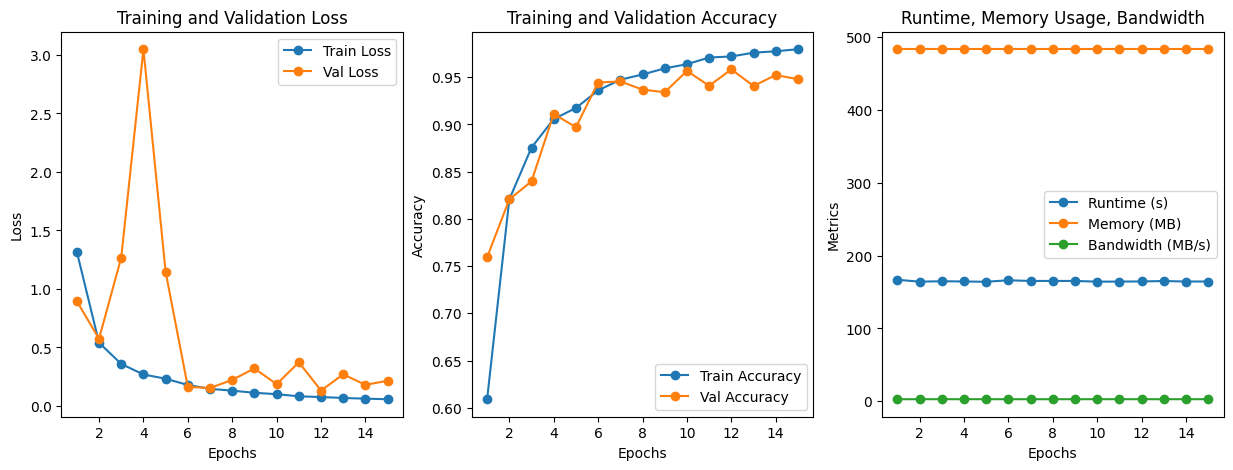

In [52]:
num_classes = 45  # Update based on dataset
model = PlantDiseaseModel(num_classes)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # Using label smoothing
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# Train model (Assuming train_loader and val_loader are defined)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=15, device=device)

In [56]:
# import torch
# model_save_path = "plant_disease_model_resnet_Final_45Class.pth"
# torch.save(model.state_dict(), model_save_path)

# print(f"Model saved to {model_save_path}")


Model saved to plant_disease_model_resnet_Final_45Class.pth


In [55]:
import torch
from sklearn.metrics import classification_report

def evaluate_model(model, data_loader, class_dict, device="cuda"):
    model.to(device)
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute precision, recall, and F1-score
    class_names = [class_dict[i] for i in sorted(class_dict.keys())]
    report = classification_report(all_labels, all_preds, target_names=class_names, digits=4)
    
    print("Classification Report:\n")
    print(report)


evaluate_model(model, test_loader, class_dict, device="cuda")


Classification Report:

                                                    precision    recall  f1-score   support

                              tomato___late_blight     0.9265    0.9692    0.9474       260
                                  tomato___healthy     0.9169    1.0000    0.9567       287
                                   grape___healthy     0.9924    0.9924    0.9924       263
          orange___haunglongbing_(citrus_greening)     0.9923    0.9961    0.9942       259
                                 soybean___healthy     0.9521    0.9770    0.9644       305
                           squash___powdery_mildew     0.9928    0.9892    0.9910       279
                                  potato___healthy     0.9056    0.9522    0.9283       272
               corn_(maize)___northern_leaf_blight     0.9483    0.9649    0.9565       285
                             tomato___early_blight     0.9144    0.9368    0.9255       285
                       tomato___septoria_leaf_spot     

In [26]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image


CLASS_NAMES = list(class_dict.values())

# Load the trained model
def load_model(model_path, num_classes=45, device="cpu"):
    model = PlantDiseaseModel(num_classes=num_classes)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Preprocess the input image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image

# Predict class of the input image
def predict(image_path, model, device="cpu"):
    image = preprocess_image(image_path).to(device)
    with torch.no_grad():
        outputs = model(image)
        probabilities = F.softmax(outputs, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
    return CLASS_NAMES[predicted_class], probabilities[0][predicted_class].item()

# Main function
if __name__ == "__main__":
    model_path = "/kaggle/input/resnetmodel/pytorch/default/1/plant_disease_model_resnet_Final_45Class.pth"  # Path to your saved model
    image_path = "/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG"  # Path to the input image
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    model = load_model(model_path, device=device)
    predicted_class, confidence = predict(image_path, model, device)
    
    print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.4f}")


RuntimeError: Error(s) in loading state_dict for PlantDiseaseModel:
	Missing key(s) in state_dict: "conv1.weight", "conv1.bias", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "conv2.weight", "conv2.bias", "bn2.weight", "bn2.bias", "bn2.running_mean", "bn2.running_var", "conv3.weight", "conv3.bias", "bn3.weight", "bn3.bias", "bn3.running_mean", "bn3.running_var", "conv4.weight", "conv4.bias", "bn4.weight", "bn4.bias", "bn4.running_mean", "bn4.running_var", "conv5.weight", "conv5.bias", "bn5.weight", "bn5.bias", "bn5.running_mean", "bn5.running_var", "conv6.weight", "conv6.bias", "bn6.weight", "bn6.bias", "bn6.running_mean", "bn6.running_var", "conv7.weight", "conv7.bias", "bn7.weight", "bn7.bias", "bn7.running_mean", "bn7.running_var", "conv8.weight", "conv8.bias", "bn8.weight", "bn8.bias", "bn8.running_mean", "bn8.running_var", "conv9.weight", "conv9.bias", "bn9.weight", "bn9.bias", "bn9.running_mean", "bn9.running_var", "conv10.weight", "conv10.bias", "bn10.weight", "bn10.bias", "bn10.running_mean", "bn10.running_var", "fc1.weight", "fc1.bias", "fc2.weight", "fc2.bias". 
	Unexpected key(s) in state_dict: "model.conv1.weight", "model.bn1.weight", "model.bn1.bias", "model.bn1.running_mean", "model.bn1.running_var", "model.bn1.num_batches_tracked", "model.layer1.0.conv1.weight", "model.layer1.0.bn1.weight", "model.layer1.0.bn1.bias", "model.layer1.0.bn1.running_mean", "model.layer1.0.bn1.running_var", "model.layer1.0.bn1.num_batches_tracked", "model.layer1.0.conv2.weight", "model.layer1.0.bn2.weight", "model.layer1.0.bn2.bias", "model.layer1.0.bn2.running_mean", "model.layer1.0.bn2.running_var", "model.layer1.0.bn2.num_batches_tracked", "model.layer1.0.conv3.weight", "model.layer1.0.bn3.weight", "model.layer1.0.bn3.bias", "model.layer1.0.bn3.running_mean", "model.layer1.0.bn3.running_var", "model.layer1.0.bn3.num_batches_tracked", "model.layer1.0.downsample.0.weight", "model.layer1.0.downsample.1.weight", "model.layer1.0.downsample.1.bias", "model.layer1.0.downsample.1.running_mean", "model.layer1.0.downsample.1.running_var", "model.layer1.0.downsample.1.num_batches_tracked", "model.layer1.1.conv1.weight", "model.layer1.1.bn1.weight", "model.layer1.1.bn1.bias", "model.layer1.1.bn1.running_mean", "model.layer1.1.bn1.running_var", "model.layer1.1.bn1.num_batches_tracked", "model.layer1.1.conv2.weight", "model.layer1.1.bn2.weight", "model.layer1.1.bn2.bias", "model.layer1.1.bn2.running_mean", "model.layer1.1.bn2.running_var", "model.layer1.1.bn2.num_batches_tracked", "model.layer1.1.conv3.weight", "model.layer1.1.bn3.weight", "model.layer1.1.bn3.bias", "model.layer1.1.bn3.running_mean", "model.layer1.1.bn3.running_var", "model.layer1.1.bn3.num_batches_tracked", "model.layer1.2.conv1.weight", "model.layer1.2.bn1.weight", "model.layer1.2.bn1.bias", "model.layer1.2.bn1.running_mean", "model.layer1.2.bn1.running_var", "model.layer1.2.bn1.num_batches_tracked", "model.layer1.2.conv2.weight", "model.layer1.2.bn2.weight", "model.layer1.2.bn2.bias", "model.layer1.2.bn2.running_mean", "model.layer1.2.bn2.running_var", "model.layer1.2.bn2.num_batches_tracked", "model.layer1.2.conv3.weight", "model.layer1.2.bn3.weight", "model.layer1.2.bn3.bias", "model.layer1.2.bn3.running_mean", "model.layer1.2.bn3.running_var", "model.layer1.2.bn3.num_batches_tracked", "model.layer2.0.conv1.weight", "model.layer2.0.bn1.weight", "model.layer2.0.bn1.bias", "model.layer2.0.bn1.running_mean", "model.layer2.0.bn1.running_var", "model.layer2.0.bn1.num_batches_tracked", "model.layer2.0.conv2.weight", "model.layer2.0.bn2.weight", "model.layer2.0.bn2.bias", "model.layer2.0.bn2.running_mean", "model.layer2.0.bn2.running_var", "model.layer2.0.bn2.num_batches_tracked", "model.layer2.0.conv3.weight", "model.layer2.0.bn3.weight", "model.layer2.0.bn3.bias", "model.layer2.0.bn3.running_mean", "model.layer2.0.bn3.running_var", "model.layer2.0.bn3.num_batches_tracked", "model.layer2.0.downsample.0.weight", "model.layer2.0.downsample.1.weight", "model.layer2.0.downsample.1.bias", "model.layer2.0.downsample.1.running_mean", "model.layer2.0.downsample.1.running_var", "model.layer2.0.downsample.1.num_batches_tracked", "model.layer2.1.conv1.weight", "model.layer2.1.bn1.weight", "model.layer2.1.bn1.bias", "model.layer2.1.bn1.running_mean", "model.layer2.1.bn1.running_var", "model.layer2.1.bn1.num_batches_tracked", "model.layer2.1.conv2.weight", "model.layer2.1.bn2.weight", "model.layer2.1.bn2.bias", "model.layer2.1.bn2.running_mean", "model.layer2.1.bn2.running_var", "model.layer2.1.bn2.num_batches_tracked", "model.layer2.1.conv3.weight", "model.layer2.1.bn3.weight", "model.layer2.1.bn3.bias", "model.layer2.1.bn3.running_mean", "model.layer2.1.bn3.running_var", "model.layer2.1.bn3.num_batches_tracked", "model.layer2.2.conv1.weight", "model.layer2.2.bn1.weight", "model.layer2.2.bn1.bias", "model.layer2.2.bn1.running_mean", "model.layer2.2.bn1.running_var", "model.layer2.2.bn1.num_batches_tracked", "model.layer2.2.conv2.weight", "model.layer2.2.bn2.weight", "model.layer2.2.bn2.bias", "model.layer2.2.bn2.running_mean", "model.layer2.2.bn2.running_var", "model.layer2.2.bn2.num_batches_tracked", "model.layer2.2.conv3.weight", "model.layer2.2.bn3.weight", "model.layer2.2.bn3.bias", "model.layer2.2.bn3.running_mean", "model.layer2.2.bn3.running_var", "model.layer2.2.bn3.num_batches_tracked", "model.layer2.3.conv1.weight", "model.layer2.3.bn1.weight", "model.layer2.3.bn1.bias", "model.layer2.3.bn1.running_mean", "model.layer2.3.bn1.running_var", "model.layer2.3.bn1.num_batches_tracked", "model.layer2.3.conv2.weight", "model.layer2.3.bn2.weight", "model.layer2.3.bn2.bias", "model.layer2.3.bn2.running_mean", "model.layer2.3.bn2.running_var", "model.layer2.3.bn2.num_batches_tracked", "model.layer2.3.conv3.weight", "model.layer2.3.bn3.weight", "model.layer2.3.bn3.bias", "model.layer2.3.bn3.running_mean", "model.layer2.3.bn3.running_var", "model.layer2.3.bn3.num_batches_tracked", "model.layer3.0.conv1.weight", "model.layer3.0.bn1.weight", "model.layer3.0.bn1.bias", "model.layer3.0.bn1.running_mean", "model.layer3.0.bn1.running_var", "model.layer3.0.bn1.num_batches_tracked", "model.layer3.0.conv2.weight", "model.layer3.0.bn2.weight", "model.layer3.0.bn2.bias", "model.layer3.0.bn2.running_mean", "model.layer3.0.bn2.running_var", "model.layer3.0.bn2.num_batches_tracked", "model.layer3.0.conv3.weight", "model.layer3.0.bn3.weight", "model.layer3.0.bn3.bias", "model.layer3.0.bn3.running_mean", "model.layer3.0.bn3.running_var", "model.layer3.0.bn3.num_batches_tracked", "model.layer3.0.downsample.0.weight", "model.layer3.0.downsample.1.weight", "model.layer3.0.downsample.1.bias", "model.layer3.0.downsample.1.running_mean", "model.layer3.0.downsample.1.running_var", "model.layer3.0.downsample.1.num_batches_tracked", "model.layer3.1.conv1.weight", "model.layer3.1.bn1.weight", "model.layer3.1.bn1.bias", "model.layer3.1.bn1.running_mean", "model.layer3.1.bn1.running_var", "model.layer3.1.bn1.num_batches_tracked", "model.layer3.1.conv2.weight", "model.layer3.1.bn2.weight", "model.layer3.1.bn2.bias", "model.layer3.1.bn2.running_mean", "model.layer3.1.bn2.running_var", "model.layer3.1.bn2.num_batches_tracked", "model.layer3.1.conv3.weight", "model.layer3.1.bn3.weight", "model.layer3.1.bn3.bias", "model.layer3.1.bn3.running_mean", "model.layer3.1.bn3.running_var", "model.layer3.1.bn3.num_batches_tracked", "model.layer3.2.conv1.weight", "model.layer3.2.bn1.weight", "model.layer3.2.bn1.bias", "model.layer3.2.bn1.running_mean", "model.layer3.2.bn1.running_var", "model.layer3.2.bn1.num_batches_tracked", "model.layer3.2.conv2.weight", "model.layer3.2.bn2.weight", "model.layer3.2.bn2.bias", "model.layer3.2.bn2.running_mean", "model.layer3.2.bn2.running_var", "model.layer3.2.bn2.num_batches_tracked", "model.layer3.2.conv3.weight", "model.layer3.2.bn3.weight", "model.layer3.2.bn3.bias", "model.layer3.2.bn3.running_mean", "model.layer3.2.bn3.running_var", "model.layer3.2.bn3.num_batches_tracked", "model.layer3.3.conv1.weight", "model.layer3.3.bn1.weight", "model.layer3.3.bn1.bias", "model.layer3.3.bn1.running_mean", "model.layer3.3.bn1.running_var", "model.layer3.3.bn1.num_batches_tracked", "model.layer3.3.conv2.weight", "model.layer3.3.bn2.weight", "model.layer3.3.bn2.bias", "model.layer3.3.bn2.running_mean", "model.layer3.3.bn2.running_var", "model.layer3.3.bn2.num_batches_tracked", "model.layer3.3.conv3.weight", "model.layer3.3.bn3.weight", "model.layer3.3.bn3.bias", "model.layer3.3.bn3.running_mean", "model.layer3.3.bn3.running_var", "model.layer3.3.bn3.num_batches_tracked", "model.layer3.4.conv1.weight", "model.layer3.4.bn1.weight", "model.layer3.4.bn1.bias", "model.layer3.4.bn1.running_mean", "model.layer3.4.bn1.running_var", "model.layer3.4.bn1.num_batches_tracked", "model.layer3.4.conv2.weight", "model.layer3.4.bn2.weight", "model.layer3.4.bn2.bias", "model.layer3.4.bn2.running_mean", "model.layer3.4.bn2.running_var", "model.layer3.4.bn2.num_batches_tracked", "model.layer3.4.conv3.weight", "model.layer3.4.bn3.weight", "model.layer3.4.bn3.bias", "model.layer3.4.bn3.running_mean", "model.layer3.4.bn3.running_var", "model.layer3.4.bn3.num_batches_tracked", "model.layer3.5.conv1.weight", "model.layer3.5.bn1.weight", "model.layer3.5.bn1.bias", "model.layer3.5.bn1.running_mean", "model.layer3.5.bn1.running_var", "model.layer3.5.bn1.num_batches_tracked", "model.layer3.5.conv2.weight", "model.layer3.5.bn2.weight", "model.layer3.5.bn2.bias", "model.layer3.5.bn2.running_mean", "model.layer3.5.bn2.running_var", "model.layer3.5.bn2.num_batches_tracked", "model.layer3.5.conv3.weight", "model.layer3.5.bn3.weight", "model.layer3.5.bn3.bias", "model.layer3.5.bn3.running_mean", "model.layer3.5.bn3.running_var", "model.layer3.5.bn3.num_batches_tracked", "model.layer4.0.conv1.weight", "model.layer4.0.bn1.weight", "model.layer4.0.bn1.bias", "model.layer4.0.bn1.running_mean", "model.layer4.0.bn1.running_var", "model.layer4.0.bn1.num_batches_tracked", "model.layer4.0.conv2.weight", "model.layer4.0.bn2.weight", "model.layer4.0.bn2.bias", "model.layer4.0.bn2.running_mean", "model.layer4.0.bn2.running_var", "model.layer4.0.bn2.num_batches_tracked", "model.layer4.0.conv3.weight", "model.layer4.0.bn3.weight", "model.layer4.0.bn3.bias", "model.layer4.0.bn3.running_mean", "model.layer4.0.bn3.running_var", "model.layer4.0.bn3.num_batches_tracked", "model.layer4.0.downsample.0.weight", "model.layer4.0.downsample.1.weight", "model.layer4.0.downsample.1.bias", "model.layer4.0.downsample.1.running_mean", "model.layer4.0.downsample.1.running_var", "model.layer4.0.downsample.1.num_batches_tracked", "model.layer4.1.conv1.weight", "model.layer4.1.bn1.weight", "model.layer4.1.bn1.bias", "model.layer4.1.bn1.running_mean", "model.layer4.1.bn1.running_var", "model.layer4.1.bn1.num_batches_tracked", "model.layer4.1.conv2.weight", "model.layer4.1.bn2.weight", "model.layer4.1.bn2.bias", "model.layer4.1.bn2.running_mean", "model.layer4.1.bn2.running_var", "model.layer4.1.bn2.num_batches_tracked", "model.layer4.1.conv3.weight", "model.layer4.1.bn3.weight", "model.layer4.1.bn3.bias", "model.layer4.1.bn3.running_mean", "model.layer4.1.bn3.running_var", "model.layer4.1.bn3.num_batches_tracked", "model.layer4.2.conv1.weight", "model.layer4.2.bn1.weight", "model.layer4.2.bn1.bias", "model.layer4.2.bn1.running_mean", "model.layer4.2.bn1.running_var", "model.layer4.2.bn1.num_batches_tracked", "model.layer4.2.conv2.weight", "model.layer4.2.bn2.weight", "model.layer4.2.bn2.bias", "model.layer4.2.bn2.running_mean", "model.layer4.2.bn2.running_var", "model.layer4.2.bn2.num_batches_tracked", "model.layer4.2.conv3.weight", "model.layer4.2.bn3.weight", "model.layer4.2.bn3.bias", "model.layer4.2.bn3.running_mean", "model.layer4.2.bn3.running_var", "model.layer4.2.bn3.num_batches_tracked", "model.fc.weight", "model.fc.bias". 

In [ ]:
# img, label = dataset[0]
# print("Image shape:", img.shape)
# print("Label:", label, dataset.classes[label])
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.imshow(img.permute(1, 2, 0))
# ax1.set_title("Original Image")
# ax2.imshow(1 - img.permute(1, 2, 0))
# ax2.set_title("Inverted Image")
# plt.show()

In [ ]:
# train_data_overview = DataLoader(dataset, batch_size=32, shuffle=True)
# images, labels = next(iter(train_data_overview))
# sample_indices = random.sample(range(len(images)), 5)

# plt.figure(figsize=(20, 3))
# for i, idx in enumerate(sample_indices):
#     plt.subplot(1, 5, i+1)
#     plt.imshow(images[idx].permute(1, 2, 0))
#     plt.title(f"{dataset.classes[labels[idx]]}")
#     plt.axis("off")
# plt.suptitle("Slide 1: Data Overview\n\n\n\n\n\n\n\n\n\n\n\n\n5 Random Training Images.", fontsize=14)
# plt.show()

In [ ]:
# random_seed = 42
# torch.manual_seed(random_seed)
# val_size = int(len(dataset) * 0.3)
# train_size = len(dataset) - val_size
# train_ds, val_ds = random_split(dataset, [train_size, val_size])

# batch_size = 32  
# train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
# val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
# test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)

# for imgs, lbls in train_loader:
#     plt.figure(figsize=(20, 8))
#     plt.imshow(make_grid(imgs, nrow=16).permute(1, 2, 0))
#     plt.axis('off')
#     break

In [ ]:
# diseases = os.listdir(train_folder)
# class_counts = {cls: len(os.listdir(os.path.join(train_folder, cls))) for cls in diseases}
# df = pd.DataFrame(list(class_counts.items()), columns=["Disease Class", "Number of Images"])
# plt.figure(figsize=(15,5))
# sns.barplot(data=df, x='Disease Class', y='Number of Images')
# plt.xticks(rotation=90)
# plt.title("Slide 2: Data Distribution\nNumber of Images per Disease Class.")
# plt.show()

In [ ]:
# def accuracy(outputs, labels):
#     _, preds = torch.max(outputs, dim=1)
#     return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
# class ImageClassificationBase(nn.Module):
#     def training_step(self, batch):
#         images, labels = batch
#         out = self(images)
#         loss = F.cross_entropy(out, labels)
#         return loss

#     def validation_step(self, batch):
#         images, labels = batch
#         out = self(images)
#         loss = F.cross_entropy(out, labels)
#         acc = accuracy(out, labels)
#         return {'val_loss': loss, 'val_acc': acc}

#     def validation_epoch_end(self, outputs):
#         batch_loss = [x['val_loss'] for x in outputs]
#         epoch_loss = torch.stack(batch_loss).mean()
#         batch_acc = [x['val_acc'] for x in outputs]
#         epoch_acc = torch.stack(batch_acc).mean()
#         return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

#     def epoch_end(self, epoch, result):
#         print(f"Epoch [{epoch}], train_loss: {result['train_loss']:.4f}, val_loss: {result['val_loss']:.4f}, val_acc: {result['val_acc']:.4f}")

In [ ]:
# class Plant_Disease_VGG16(ImageClassificationBase):
#     def __init__(self):
#         super().__init__()
#         self.network = models.vgg16(pretrained=True)
#         for param in list(self.network.features.parameters())[:-5]:
#             param.requires_grad = False
#         num_ftrs = self.network.classifier[-1].in_features
#         self.network.classifier[-1] = nn.Linear(num_ftrs, 38)
        
#     def forward(self, xb):
#         return self.network(xb)

In [ ]:
# def get_default_device():
#     return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# def to_device(data, device):
#     if isinstance(data, (list, tuple)):
#         return [to_device(x, device) for x in data]
#     return data.to(device, non_blocking=True)
# class DeviceDataLoader():
#     def __init__(self, dl, device):
#         self.dl = dl
#         self.device = device
#     def __iter__(self):
#         for b in self.dl:
#             yield to_device(b, self.device)
#     def __len__(self):
#         return len(self.dl)

# device = get_default_device()
# print("Using device:", device)

In [ ]:
# train_loader = DeviceDataLoader(train_loader, device)
# val_loader = DeviceDataLoader(val_loader, device)
# test_loader = DeviceDataLoader(test_loader, device)

# vgg_model_ft = to_device(Plant_Disease_VGG16(), device)
# print(vgg_model_ft)

In [ ]:
# @torch.no_grad()
# def evaluate(model, val_loader):
#     model.eval()
#     outputs = [model.validation_step(batch) for batch in val_loader]
#     return model.validation_epoch_end(outputs)

# def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
#     history = []
#     optimizer = opt_func(model.parameters(), lr)
#     for epoch in range(epochs):
#         model.train()
#         train_losses = []
#         for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
#             loss = model.training_step(batch)
#             train_losses.append(loss)
#             loss.backward()
#             optimizer.step()
#             optimizer.zero_grad()
#         torch.cuda.empty_cache()
#         result = evaluate(model, val_loader)
#         result['train_loss'] = torch.stack(train_losses).mean().item()
#         model.epoch_end(epoch, result)
#         history.append(result)
#     return history

# history_vgg_ft = fit(10, 0.0001, vgg_model_ft, train_loader, val_loader, opt_func=torch.optim.Adam)

In [ ]:
# test_sample_indices = random.sample(range(len(test_ds.imgs)), 5)
# plt.figure(figsize=(20, 5))

# for i, idx in enumerate(test_sample_indices):
#     img_path, _ = test_ds.imgs[idx]
#     img = Image.open(img_path)
#     img = transform(img)

#     img = img.unsqueeze(0).to(device)

#     prediction = vgg_model_ft(img)
#     pred_class = dataset.classes[torch.argmax(prediction)]
#     true_label = img_path.split('/')[-2]

#     img_cpu = img.squeeze(0).cpu()

#     plt.subplot(1, 5, i + 1)
#     plt.imshow(img_cpu.permute(1, 2, 0).numpy())
#     plt.title(f"True: {true_label}\nPred: {pred_class}")
#     plt.axis("off")

# plt.suptitle("Slide 5: Model Predictions\n5 Test Images with True and Predicted Labels.", fontsize=14)
# plt.show()

In [ ]:
# def plot_losses(history):
#     train_losses = [x.get('train_loss') for x in history]
#     val_losses = [x['val_loss'] for x in history]
#     plt.plot(train_losses, '-bx', label="Train Loss")
#     plt.plot(val_losses, '-rx', label="Val Loss")
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.title('Loss vs. Epochs')
#     plt.show()

# def plot_accuracies(history):
#     accuracies = [x['val_acc'] for x in history]
#     plt.plot(accuracies, '-x')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.title('Accuracy vs. Epochs')
#     plt.show()

# plot_accuracies(history_vgg_ft)
# plot_losses(history_vgg_ft)

# print("Evaluation on Test Set (Fine-tuned VGG16):")
# print(evaluate(vgg_model_ft, test_loader))

In [ ]:
# def calculate_accuracy(test_loader, model):
#     correct = 0
#     total = 0
#     model.eval()
#     with torch.no_grad():
#         for images, labels in test_loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             _, predicted = torch.max(outputs, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
#     accuracy = correct / total * 100
#     return accuracy

# accuracy = calculate_accuracy(test_loader, vgg_model_ft)
# print(f"Test Accuracy: {accuracy:.2f}%")

In [ ]:
# torch.save(vgg_model_ft.state_dict(), '/kaggle/working/vgg_ft_model.pth')


In [ ]:
# print("oh yeah")

In [3]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.models.segmentation import deeplabv3_resnet50
from PIL import Image

# List of your disease classes
DISEASE_CLASSES = [
    "Apple__Apple_scab", "Apple_Black_rot", "Apple_Cedar_apple_rust", "Apple__healthy",
    "Blueberry__healthy", "Cherry(including_sour)_Powdery_mildew", 
    "Cherry_(including_sour)healthy", "Corn(maize)_Cercospora_leaf_spot Gray_leaf_spot",
    "Corn_(maize)Common_rust", "Corn_(maize)_Northern_Leaf_Blight", 
    "Corn_(maize)healthy", "Grape_Black_rot", "Grape_Esca(Black_Measles)",
    "Grape__Leaf_blight(Isariopsis_Leaf_Spot)", "Grape___healthy", 
    "Orange__Haunglongbing(Citrus_greening)", "Peach__Bacterial_spot", "Peach__healthy",
    "Pepper,bell_Bacterial_spot", "Pepper,_bell_healthy", "Potato__Early_blight",
    "Potato__Late_blight", "Potato_healthy", "Raspberry_healthy", "Soybean__healthy",
    "Squash__Powdery_mildew", "Strawberry_Leaf_scorch", "Strawberry__healthy",
    "Tomato__Bacterial_spot", "Tomato_Early_blight", "Tomato__Late_blight", 
    "Tomato__Leaf_Mold", "Tomato__Septoria_leaf_spot", 
    "Tomato__Spider_mites Two-spotted_spider_mite", "Tomato__Target_Spot", 
    "Tomato__Tomato_Yellow_Leaf_Curl_Virus", "Tomato_Tomato_mosaic_virus", "Tomato__healthy"
]

# Dataset for disease segmentation
class PlantDiseaseSegmentationDataset(Dataset):
    def _init_(self, img_dir, mask_dir, transform=None, mask_transform=None):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.mask_transform = mask_transform
        self.images = [img for img in os.listdir(img_dir) if img.endswith(('.jpg', '.jpeg', '.png'))]
        
    def _len_(self):
        return len(self.images)
    
    def _getitem_(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.img_dir, img_name)
        mask_path = os.path.join(self.mask_dir, img_name.replace('.jpg', '_mask.png')
                                             .replace('.jpeg', '_mask.png')
                                             .replace('.png', '_mask.png'))
        
        image = Image.open(img_path).convert('RGB')
        
        # Handle cases where mask might not exist
        if os.path.exists(mask_path):
            mask = Image.open(mask_path).convert('L')  # Grayscale mask
        else:
            # Create an empty mask if not available
            mask = Image.new('L', image.size, 0)
        
        if self.transform:
            image = self.transform(image)
        if self.mask_transform:
            mask = self.mask_transform(mask)
        
        # Convert mask to binary (0 = healthy, 1 = diseased)
        mask = (mask > 0).float()
        
        return image, mask

# U-Net model for more precise segmentation
class UNet(nn.Module):
    def _init_(self, n_channels=3, n_classes=1, bilinear=True):
        super(UNet, self)._init_()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        # Encoder (downsampling)
        self.inc = self._double_conv(n_channels, 64)
        self.down1 = self._down(64, 128)
        self.down2 = self._down(128, 256)
        self.down3 = self._down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = self._down(512, 1024 // factor)

        # Decoder (upsampling)
        self.up1 = self._up(1024, 512 // factor, bilinear)
        self.up2 = self._up(512, 256 // factor, bilinear)
        self.up3 = self._up(256, 128 // factor, bilinear)
        self.up4 = self._up(128, 64, bilinear)
        self.outc = nn.Conv2d(64, n_classes, kernel_size=1)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

    def _double_conv(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def _down(self, in_channels, out_channels):
        return nn.Sequential(
            nn.MaxPool2d(2),
            self._double_conv(in_channels, out_channels)
        )

    def _up(self, in_channels, out_channels, bilinear=True):
        if bilinear:
            up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            conv = self._double_conv(in_channels, out_channels)
            return nn.Sequential(up, conv)
        else:
            up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
            conv = self._double_conv(in_channels, out_channels)
            return nn.Sequential(up, conv)

In [4]:
class DiseaseClassificationAndLocalization:
    def _init_(self, classification_model_path, localization_model_path, device='cuda'):
        self.device = device
        
        # Load classification model
        self.classification_model = self.load_classification_model(classification_model_path)
        self.classification_model.to(device)
        self.classification_model.eval()
        
        # Load localization model
        self.localization_model = self.load_localization_model(localization_model_path)
        self.localization_model.to(device)
        self.localization_model.eval()
        
        # Preprocessing transforms
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        
    def load_classification_model(self, model_path):
        # Load your existing classification model here
        # Example:
        model = torch.load(model_path)
        return model
    
    def load_localization_model(self, model_path):
        # Load the disease localization model
        model = UNet(n_channels=3, n_classes=1)
        model.load_state_dict(torch.load(model_path))
        return model
    
    def predict(self, image_path):
        # Load and preprocess image
        image = Image.open(image_path).convert('RGB')
        orig_size = image.size
        processed_image = self.transform(image).unsqueeze(0).to(self.device)
        
        # Get disease classification
        with torch.no_grad():
            classification_output = self.classification_model(processed_image)
            _, predicted_idx = torch.max(classification_output, 1)
            predicted_disease = DISEASE_CLASSES[predicted_idx.item()]
            
            # Check if it's a healthy plant
            if "healthy" in predicted_disease:
                return {
                    "disease": predicted_disease,
                    "has_disease": False,
                    "disease_mask": None
                }
            
            # Get disease localization
            localization_output = self.localization_model(processed_image)
            disease_mask = torch.sigmoid(localization_output).squeeze().cpu().numpy()
            
            # Resize mask back to original image size
            disease_mask_pil = Image.fromarray((disease_mask * 255).astype(np.uint8))
            disease_mask_pil = disease_mask_pil.resize(orig_size, Image.BILINEAR)
            disease_mask = np.array(disease_mask_pil) / 255.0
            
        return {
            "disease": predicted_disease,
            "has_disease": True,
            "disease_mask": disease_mask
        }
    
    def visualize_results(self, image_path, save_path=None):
        import matplotlib.pyplot as plt
        
        result = self.predict(image_path)
        image = Image.open(image_path).convert('RGB')
        
        plt.figure(figsize=(12, 4))
        
        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title('Original Image')
        plt.axis('off')
        
        # Disease prediction
        plt.subplot(1, 3, 2)
        plt.imshow(image)
        disease_name = result["disease"].replace('', ' - ').replace('', ' ')
        plt.title(f'Predicted: {disease_name}')
        plt.axis('off')
        
        # Disease localization
        plt.subplot(1, 3, 3)
        plt.imshow(image)
        if result["has_disease"]:
            plt.imshow(result["disease_mask"], alpha=0.5, cmap='jet')
            plt.title('Disease Localization')
        else:
            plt.title('Healthy Plant - No Disease')
        plt.axis('off')
        
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path)
            plt.close()
        else:
            plt.show()

In [5]:
def train_localization_model(data_dir, mask_dir, save_path, epochs=50, batch_size=16, learning_rate=0.001):
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Data transforms
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    mask_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])
    
    # Create dataset and dataloader
    dataset = PlantDiseaseSegmentationDataset(
        img_dir=data_dir, 
        mask_dir=mask_dir,
        transform=transform,
        mask_transform=mask_transform
    )
    
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    
    # Create model
    model = UNet(n_channels=3, n_classes=1)
    model.to(device)
    
    # Loss function and optimizer
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)
    
    # Training loop
    best_loss = float('inf')
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        
        for images, masks in dataloader:
            images = images.to(device)
            masks = masks.to(device)
            
            # Zero gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * images.size(0)
        
        epoch_loss = running_loss / len(dataloader.dataset)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')
        
        # Learning rate scheduling
        scheduler.step(epoch_loss)
        
        # Save best model
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            torch.save(model.state_dict(), save_path)
            print(f"Saved best model with loss: {best_loss:.4f}")

# Example usage:
# train_localization_model(
#     data_dir='path/to/images', 
#     mask_dir='path/to/masks',
#     save_path='localization_model.pth'
# )

In [ ]:
def generate_disease_masks_with_cam(classification_model, data_dir, output_mask_dir, device='cuda'):
    import cv2
    from pytorch_grad_cam import GradCAM
    from pytorch_grad_cam.utils.image import show_cam_on_image
    
    os.makedirs(output_mask_dir, exist_ok=True)
    
    # Set up CAM
    target_layers = [classification_model.layer4[-1]]  # Assumes a ResNet-like model
    cam = GradCAM(model=classification_model, target_layers=target_layers, use_cuda=(device=='cuda'))
    
    # Preprocessing transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    # Process each image
    image_files = [f for f in os.listdir(data_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    for img_file in image_files:
        img_path = os.path.join(data_dir, img_file)
        
        # Load and preprocess image
        image = Image.open(img_path).convert('RGB')
        input_tensor = transform(image).unsqueeze(0).to(device)
        
        # Get classification result
        with torch.no_grad():
            output = classification_model(input_tensor)
            _, predicted = torch.max(output, 1)
            
            # Skip healthy plants
            predicted_class = DISEASE_CLASSES[predicted.item()]
            if "healthy" in predicted_class:
                continue
        
        # Generate CAM visualization
        grayscale_cam = cam(input_tensor=input_tensor, target_category=predicted.item())
        grayscale_cam = grayscale_cam[0, :]
        
        # Threshold the CAM to create a binary mask (adjust threshold as needed)
        mask = (grayscale_cam > 0.5).astype(np.uint8) * 255
        
        # Save the mask
        mask_filename = img_file.rsplit('.', 1)[0] + '_mask.png'
        mask_path = os.path.join(output_mask_dir, mask_filename)
        cv2.imwrite(mask_path, mask)
        
        print(f"Generated mask for {img_file}")